# MNIST Dataseti

0'dan 10'a kadar yazılmış el yazısı rakamların fotoğraflarıdır. 60000 resim içerir. AI için aslında bir hello world'dür. [Datasetin rekoru](https://www.kaggle.com/cdeotte/mnist-perfect-100-using-knn) %100'dür.

In [ ]:
import matplotlib.pyplot as plt
from tensorflow import keras
import numpy as np
%matplotlib inline

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

(60000, 28, 28) (10000, 28, 28)


5

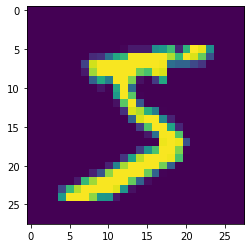

In [ ]:
print(x_train.shape, x_test.shape)
plt.imshow(x_train[0])
y_train[0]

In [ ]:
x_train, x_test = keras.utils.normalize(x_train), keras.utils.normalize(x_test)

# keras.utils.normalize?????

> For example, in the default case, it would normalize the data using L2-normalization (i.e. the sum of squared of elements would be equal to one).

Bu dataset için veriyi 0 ile 1 arasına almanan başka bir yolu.

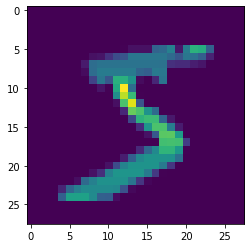

In [ ]:
plt.imshow(x_train[0])

In [ ]:
x_train, x_test = x_train.reshape(60000, 28, 28, 1), x_test.reshape(10000, 28, 28, 1)

# Reshape, neden?

Bu bir convolutional neural network. Keras'larda, Conv2D, 4D array inputu alır. Yani, kısaca, şöyle bir şey yaptık:

```
[[[1, 2]]] -----> [[[ [1], [2] ]]]
```

In [ ]:
model = keras.Sequential([
                          keras.layers.InputLayer(input_shape=(28, 28, 1)),
                          keras.layers.Conv2D(64, (3,3), activation='relu'),
                          keras.layers.MaxPool2D((2,2)),
                          keras.layers.Conv2D(64, (3,3), activation='relu'),
                          keras.layers.MaxPool2D((2,2)),
                          keras.layers.BatchNormalization(),
                          keras.layers.Flatten(),
                          keras.layers.Dense(64, activation='relu'),
                          keras.layers.Dropout(0.1),
                          keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
callback = keras.callbacks.EarlyStopping(monitor='accuracy', patience=1)

In [ ]:
model.fit(x_train, y_train, batch_size=128, epochs=20, callbacks=[callback])

Epoch 1/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1497 - accuracy: 0.9534
Epoch 2/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0443 - accuracy: 0.9862
Epoch 3/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0313 - accuracy: 0.9901
Epoch 4/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0226 - accuracy: 0.9929
Epoch 5/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0178 - accuracy: 0.9942
Epoch 6/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0161 - accuracy: 0.9947
Epoch 7/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0131 - accuracy: 0.9952
Epoch 8/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0108 - accuracy: 0.9961
Epoch 9/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0098 - accuracy: 0.9965
Epoch 10/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0090 - accuracy: 0.9969

## Batch Size?

Batch size, kısacası, yapay zekanın veriyi gruplandırıp tekrar beslemesi. Örneğin 1000 veriyi 100 batch size'da beslersek, 100'lü parçalara bölüp ayrı ayrı eğitilecek. Bu eğitimi hızlandırır.

In [ ]:
model.evaluate(x_test, y_test)
# Yüzde 99.27 accuracy!

313/313 [==============================] - 1s 3ms/step - loss: 0.0386 - accuracy: 0.9911


[0.038621023297309875, 0.991100013256073]